In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_visit = pd.read_csv("/content/demo_hospital_outpatient_data_clean.zip")
df_visit.head()

,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration(minutes),Nursing(minutes),Laboratory(minutes),Consultation(minutes),Pharmacy(minutes)
0,2020-05-06,688923,68,Female,Diabetes,True,20006,2274.0,33.0,105.0,101.0,28.0,112.0
1,2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005,3430.0,46.0,75.0,84.0,102.0,36.0
2,2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003,1836.0,107.0,81.0,5.0,77.0,36.0
3,2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006,3250.0,66.0,31.0,101.0,35.0,92.0
4,2018-04-30,454666,24,Male,Malaria,True,10006,2262.0,68.0,55.0,60.0,90.0,104.0


In [7]:
avg_cost_by_gender = df_visit.groupby('Gender')['Total_Cost'].mean()
avg_cost_by_gender

Gender
Female    2632.877112
Male      2618.993034
Name: Total_Cost, dtype: float64

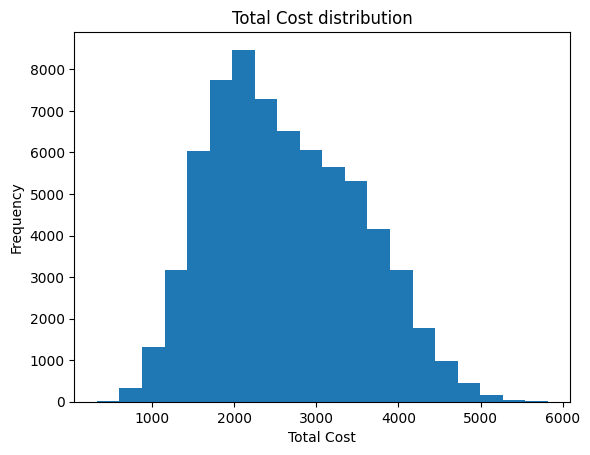

In [8]:
plt.hist(df_visit['Total_Cost'], bins=20)
plt.title('Total Cost distribution')
plt.xlabel('Total Cost')
plt.ylabel("Frequency")
plt.show()

In [9]:
avg_cost_by_insurance = df_visit[df_visit['Has_Insurance'] == True]['Total_Cost'].mean()
avg_cost_by_insurance

1876.0660470202297

In [10]:
avg_cost_without_insurance = df_visit[df_visit['Has_Insurance'] == False]['Total_Cost'].mean()
avg_cost_without_insurance

3125.477213683929

In [11]:
df_visit['Visit_Date'] = pd.to_datetime(df_visit['Visit_Date'])
df_visit.set_index("Visit_Date", inplace=True)
annual_total_cost = df_visit['Total_Cost'].resample("Y").sum()

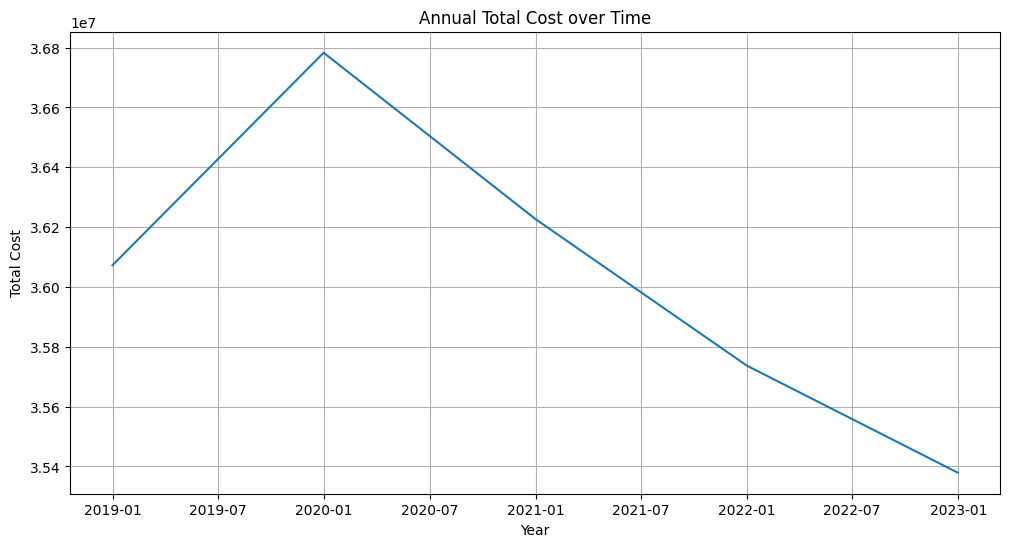

In [12]:
plt.figure(figsize=(12,6))
plt.plot(annual_total_cost.index, annual_total_cost.values)
plt.title("Annual Total Cost over Time")
plt.xlabel("Year")
plt.ylabel("Total Cost")
plt.grid(True)
plt.show()